In [7]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# call this script from the directory which has both the *label*.png and *predlabels*.png files

dir_full_path = "/home/peteflo/tensorflow-deeplab-resnet/output_all_drill_networks_10hz/"

with open(os.path.join(dir_full_path,"summary.txt")) as f:
        content = f.readlines()

content = [x.strip() for x in content]

# x axis is hz
x_axis = [1, 2, 5, 10, 25, 50]

ious_by_label = {}
std_by_label = {}

for i in content:
    split = i.split()
    if len(split) == 1:
        trial_name = i
        print "trial name", i
        continue

    label_number = split[0]
    iou          = split[1]
    std          = split[2]
    object_name  = split[3]

    if object_name not in ious_by_label.keys():
        ious_by_label[object_name] = []
        std_by_label[object_name] = []

    ious_by_label[object_name].append(float(iou))
    std_by_label[object_name].append(float(std))

trial name predlabels_drill_01_train_scenes.png
trial name predlabels_drill_02_train_scenes.png
trial name predlabels_drill_05_train_scenes.png
trial name predlabels_drill_10_train_scenes.png
trial name predlabels_drill_25_train_scenes.png
trial name predlabels_drill_50_train_scenes.png
trial name predlabels_drill_test_11_scenes.png


background
drill


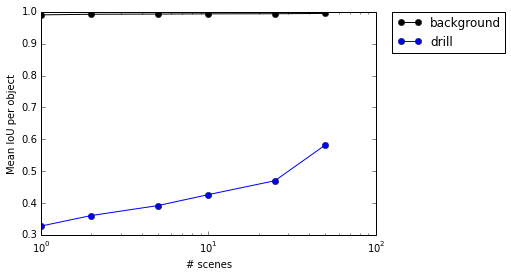

In [19]:
for object_name, val in sorted(ious_by_label.iteritems()):
    if (object_name != "drill") and object_name != "background":
        continue
    print object_name
    style = 'o-'
    if object_name == "background":
        style = style + 'k'
    plt.semilogx(x_axis, val[:-1], style, label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

plt.xlabel("# scenes")
plt.ylabel("Mean IoU per object")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()